In [352]:
# import packages and librarie
import seaborn as sns
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [329]:
mortgage_details = pd.read_csv('regression/data/mortgages_details.csv')
mortgage_prop_agent_spend = pd.read_csv('regression/data/mortgages_prop_agent_spend.csv')
mortgage_child_daily_spend = pd.read_csv('regression/data/mortgages_prop_child_daily_spend.csv')
mortgage_rent = pd.read_csv('regression/data/mortgages_renting.csv')
mortgage_child_spend = pd.read_csv('regression/data/mortgages_prop_child_spend.csv')
mortgage_so = pd.read_csv('regression/data/mortgages_prop_so.csv')
mortgage_pet = pd.read_csv('regression/data/mortgages_prop_pet.csv')

In [330]:
# inner join
df3 = pd.merge(mortgage_child_spend, mortgage_child_daily_spend, how = 'inner')
#left join
df4 = pd.merge(df3, mortgage_prop_agent_spend, how='left')
#right join
df5 = pd.merge(df4, mortgage_details, how='right')
df6 = pd.concat([df5, mortgage_so]) 


In [337]:
# drop duplicates
df8 = df6.drop_duplicates()

In [339]:
# create new columns then create new df

In [340]:
df8['child_credit_amount'] = df8['child_credit_amount'].fillna((df8['child_credit_amount'].mean()))
df8['mortgage_payment'] = df8['mortgage_payment'].fillna((df8['mortgage_payment'].mean()))
df9 = df8[['f_num','child_credit_amount','mortgage_provider', 'diy_spend', 'mortgage_payment']]

In [341]:
# drop all rows with na
df9 = df9.dropna()

In [342]:
df9.mortgage_provider.unique()

array(['ACCORD MORTGAGES', 'RBS MORTGAGES', 'MTG 40038893987620',
       'BARCLAYS UK MTGES', 'IF MORTGAGES', 'TULIP MORTGAGES',
       'MTG 40058842598914', 'LLOYDS BANK MTG', 'NATWEST MTGE PAYT',
       'PRECISE MORTGAGES', 'COOP BANK MORTGAGE', 'MTG 40108821235788',
       'MORTGAGE EXPRESS', 'THE MORTGAGE LENDE', 'MTG 40058823892476',
       'MTG 40058823892484', 'MTG 40098884444213', 'SWB MORTGAGES',
       'THE MORTGAGE BUSIN', 'ECOLOGY BS MORTGAG', 'TESCOBANKMORTGAGES',
       'NOTTINGHAM BS MTGE', 'LANDMARK MORTGAGES', 'PMCL RE MTGF 08-1',
       'THE MORTGAGE BUS', 'MORTGAGES 1 LTD', 'HSBC MTGE',
       'KENSINGTON MORTGAG', 'MTG 40038842889919', 'FT MTG 8382838691B',
       'NW MORTGAGE MRP', 'MTG 40088824449398', 'ROOFTOP MORTGAGES',
       'ASTRA MORTGAGES', 'MTG 40018882672383', 'FT MTG 8383753655A',
       'MTG 40038835183510', 'MTG 40038835183502', 'BLUESTONE MORTGAGE',
       'PARAGON MORTGAGES', 'MTG 40058894603257', 'MTG 40058893855783',
       'MTG 40058893855759', '

In [343]:
df9.mortgage_provider.value_counts()

RBS MORTGAGES         86
ACCORD MORTGAGES      40
MORTGAGE EXPRESS      34
LLOYDS BANK MTG       30
THE MORTGAGE BUSIN    20
IF MORTGAGES          16
BARCLAYS UK MTGES     16
COOP BANK MORTGAGE    11
LANDMARK MORTGAGES    11
PRECISE MORTGAGES      9
SWB MORTGAGES          9
TULIP MORTGAGES        8
NW MORTGAGE MRP        7
MORTGAGES 1 LTD        7
NATWEST MTGE PAYT      7
NOTTINGHAM BS MTGE     5
THE MORTGAGE BUS       5
ROOFTOP MORTGAGES      4
KENSINGTON MORTGAG     4
TESCOBANKMORTGAGES     3
PMCL RE MTGF 08-1      3
ECOLOGY BS MORTGAG     2
MTG 40108821235788     2
MTG 40058823892476     2
THE MORTGAGE LENDE     2
MTG 40018882672383     2
MTG 40058842598914     2
MTG 40058823892484     2
MTG 40038835183510     1
MTG 40088824449398     1
ASTRA MORTGAGES        1
MTG 40038842889919     1
MTG 40078822898209     1
FT MTG 8383753655A     1
HSBC MTGE              1
MTG 40058893855759     1
MTG 40038835183502     1
BLUESTONE MORTGAGE     1
MTG 40058894603257     1
MTG 40098884444213     1


In [344]:
# get top five most relevant mortgage providers
df_mortg_provider = pd.get_dummies(df9.mortgage_provider)
df_mortg_provider_top_five = df_mortg_provider[['ACCORD MORTGAGES', 'RBS MORTGAGES', 'MORTGAGE EXPRESS', 'LLOYDS BANK MTG', 'BARCLAYS UK MTGES']]

In [345]:
# merge df 10 with mortgage providers with (0 or 1)
df_mortg_provider_top_five['f_num'] = df9['f_num']

df10 = pd.merge(df9, df_mortg_provider_top_five)

<ipython-input-345-ab52fc7f402a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mortg_provider_top_five['f_num'] = df9['f_num']


In [346]:
df10

,f_num,child_credit_amount,mortgage_provider,diy_spend,mortgage_payment,ACCORD MORTGAGES,RBS MORTGAGES,MORTGAGE EXPRESS,LLOYDS BANK MTG,BARCLAYS UK MTGES
0,F68830788,6324.84,ACCORD MORTGAGES,280.82,4162.78,1,0,0,0,0
1,F27157405,6414.61,ACCORD MORTGAGES,74.58,5175.36,1,0,0,0,0
2,F47139968,376.42,ACCORD MORTGAGES,78.26,10506.60,1,0,0,0,0
3,F51341810,5836.68,RBS MORTGAGES,67.28,5718.65,0,1,0,0,0
4,F39358205,6735.28,RBS MORTGAGES,801.89,4232.46,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
386,F11883867,872.37,NOTTINGHAM BS MTGE,5867.83,8564.52,0,0,0,0,0
387,F61255865,904.42,RBS MORTGAGES,1240.87,5439.36,0,1,0,0,0
388,F12710774,7887.93,MORTGAGE EXPRESS,176.87,1809.36,0,0,1,0,0
389,F34667216,2930.37,RBS MORTGAGES,814.12,4578.09,0,1,0,0,0


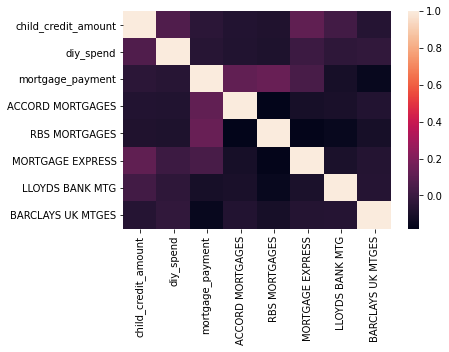

In [347]:
# correlation heatmap
sns.heatmap(df10.corr())

In [348]:
# correclation values
df10.corr()

,child_credit_amount,diy_spend,mortgage_payment,ACCORD MORTGAGES,RBS MORTGAGES,MORTGAGE EXPRESS,LLOYDS BANK MTG,BARCLAYS UK MTGES
child_credit_amount,1.000000,0.065596,-0.045181,-0.072261,-0.081227,0.111807,0.023899,-0.059618
diy_spend,0.065596,1.000000,-0.057089,-0.075373,-0.086131,0.008478,-0.031895,-0.024113
mortgage_payment,-0.045181,-0.057089,1.000000,0.119640,0.137812,0.045604,-0.105593,-0.151968
ACCORD MORTGAGES,-0.072261,-0.075373,0.119640,1.000000,-0.179257,-0.109138,-0.097316,-0.069730
RBS MORTGAGES,-0.081227,-0.086131,0.137812,-0.179257,1.000000,-0.171672,-0.153076,-0.109684
MORTGAGE EXPRESS,0.111807,0.008478,0.045604,-0.109138,-0.171672,1.000000,-0.093198,-0.066780
LLOYDS BANK MTG,0.023899,-0.031895,-0.105593,-0.097316,-0.153076,-0.093198,1.000000,-0.059546
BARCLAYS UK MTGES,-0.059618,-0.024113,-0.151968,-0.069730,-0.109684,-0.066780,-0.059546,1.000000


In [350]:
# when trying for first iteration, mortgage providers were not having much affect on the model, hence ommitted it
# defining input and output data
X = df10[[ 'diy_spend', 'child_credit_amount']]
y = df10.mortgage_payment

# Linear Regression

In [353]:
lr = LinearRegression()

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [355]:
lr.fit(X_train,y_train)

LinearRegression()

In [356]:
y_pred = lr.predict(X_test)
y_pred

array([5727.96268598, 5667.92430017, 6209.82344902, 5604.81593694,
       5191.4622583 , 5627.08945114, 5544.65226612, 5271.26175227,
       5531.74397671, 5710.11047661, 5695.42077774, 5473.27900918,
       5428.21085139, 5453.70262095, 5686.61377285, 5591.85531038,
       5079.67319082, 5457.3472923 , 5375.29536952, 5704.3049207 ,
       5348.55584586, 5658.9242855 , 5729.77052522, 5650.98314099,
       5058.8623644 , 5320.39111153, 5429.79002158, 4911.39936238,
       5428.72392914, 6206.00627201, 5439.99567205, 5252.25807931,
       5252.25807931, 5457.3472923 , 5580.68942058, 5460.10242073,
       5448.06894915, 5655.53668954, 5579.70587282, 5309.96062201,
       5034.15595473, 5271.26175227, 5672.49472136, 5697.72467706,
       5456.48489603, 5595.69234346, 5353.26120311, 5500.72866581,
       5573.13846302, 5406.57673307, 5656.35994499, 5657.90928109,
       5621.24783726, 5357.60796929, 6209.82344902, 5509.20557801,
       5709.85969764, 5327.77930786, 5717.68631762, 6209.82344

In [357]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
# The coefficients
print('MAE is: \n', mean_absolute_error(y_test, y_pred))
print('MSE is: \n', mean_squared_error(y_test, y_pred))

MAE is: 
 2489.060090704367
MSE is: 
 10500446.289864067


In [358]:
ae = y_test - y_pred
error_df = pd.DataFrame(ae)
error_df["y_test"] = y_test
error_df["y_pred"] = y_pred

error_df

,mortgage_payment,y_test,y_pred
9,-2968.812686,2759.15,5727.962686
42,-2014.124300,3653.80,5667.924300
33,-1034.223449,5175.60,6209.823449
312,-392.255937,5212.56,5604.815937
370,3783.037742,8974.50,5191.462258
...,...,...,...
3,344.047703,5718.65,5374.602297
18,-644.449651,4524.00,5168.449651
94,-1265.924194,4335.36,5601.284194
250,-2985.401688,2409.60,5395.001688


In [361]:
print('Coeeficient is: \n', lr.coef_)
print('intercept is: \n', lr.intercept_)

Coeeficient is: 
 [ 0.01228534 -0.05873046]
intercept is: 
 5716.566647460202


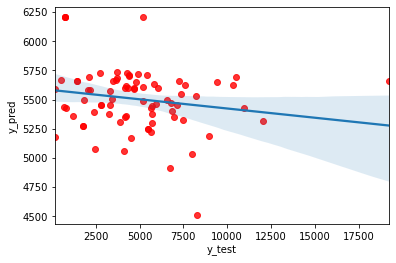

In [362]:
sns.regplot(x="y_test", y="y_pred", data=error_df, scatter_kws={"color":"red"})

# XGBoost
##### XGBoost is know to produce better results as it uses gradient boosting 

In [363]:
import xgboost as xgb

In [364]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [366]:
dtest = xgb.DMatrix(X_test, label=y_test)
dtrain = xgb.DMatrix(X_train, label=y_train)

## Hyperparamater tuning

In [369]:
import numpy as np
# "Learn" the mean from the training data
mean_train = np.mean(y_train)# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 2493.27


In [370]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [371]:
params['eval_metric'] = "mae"
num_boost_round = 999

In [372]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[17:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:3951.32202
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:3135.47827
[2]	Test-mae:2733.37891
[3]	Test-mae:2518.95752
[4]	Test-mae:2416.58984
[5]	Test-mae:2386.02417
[6]	Test-mae:2354.00977
[7]	Test-mae:2354.74707
[8]	Test-mae:2351.68896
[9]	Test-mae:2300.00830
[10]	Test-mae:2287.46973
[11]	Test-mae:2288.16357
[12]	Test-mae:2246.05469
[13]	Test-mae:2251.84937
[14]	Test-mae:2228.84619
[15]	Test-mae:2200.41797
[16]	Test-mae:2192.82373
[17]	Test-mae:2161.61353
[18]	Test-mae:2150.16089
[19]	Test-mae:2152.44434
[20]	Test-mae:2139.14478
[21]	Test-mae:2148.36035
[22]	Test-mae:2139.33691
[23]	Test-mae:2132.20679
[24]	Test-mae:2101.41528
[25]	Test-mae:2105.49438
[26]	Test-mae:2105.14844
[27]	Test-mae:2106.04468
[28]	Test-mae:2099.94702
[29]	Test-mae:2099.13843
[30]	Test-mae:2091.74390
[3

[311]	Test-mae:1975.21143
[312]	Test-mae:1975.20789
[313]	Test-mae:1975.20984
[314]	Test-mae:1975.20813
[315]	Test-mae:1975.20178
[316]	Test-mae:1975.19861
[317]	Test-mae:1975.19812
[318]	Test-mae:1975.19836
[319]	Test-mae:1975.19739
[320]	Test-mae:1975.19604
[321]	Test-mae:1975.19604
[322]	Test-mae:1975.18872
[323]	Test-mae:1975.18616
[324]	Test-mae:1975.18042
[325]	Test-mae:1975.17407
[326]	Test-mae:1975.17444
[327]	Test-mae:1975.17004
[328]	Test-mae:1975.16553
[329]	Test-mae:1975.16321
[330]	Test-mae:1975.16455
[331]	Test-mae:1975.16333
[332]	Test-mae:1975.16431
[333]	Test-mae:1975.15857
[334]	Test-mae:1975.16199
[335]	Test-mae:1975.15820
[336]	Test-mae:1975.15698
[337]	Test-mae:1975.15698
[338]	Test-mae:1975.15649
[339]	Test-mae:1975.15808
[340]	Test-mae:1975.15271
[341]	Test-mae:1975.15210
[342]	Test-mae:1975.14990
[343]	Test-mae:1975.14893
[344]	Test-mae:1975.14893
[345]	Test-mae:1975.14661
[346]	Test-mae:1975.14453
[347]	Test-mae:1975.14380
[348]	Test-mae:1975.14600
[349]	Test-m

In [373]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[17:16:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,3914.639062,70.644754,3979.072363,455.270939
1,3031.222363,61.535550,3215.185937,447.224885
2,2474.930957,68.596973,2810.534521,383.099964
3,2132.456836,60.006395,2607.772754,358.800054
4,1897.709643,81.488532,2467.369507,335.183072
5,1739.652930,93.528834,2394.089404,307.928829
6,1620.054883,102.278156,2350.186157,283.910905
7,1533.962622,117.614074,2315.550439,275.627462
8,1464.839697,116.893477,2280.577857,274.494106
9,1396.750684,131.515432,2247.825732,268.555627


In [374]:
cv_results['test-mae-mean'].min()

2166.4085447999996

In [375]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [376]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[17:16:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 2048.9593996 for 253 rounds
CV with max_depth=9, min_child_weight=6
[1

	MAE 2103.0725342 for 582 rounds
Best params: 10, 5, MAE: 2016.0252682000003


In [377]:
params['max_depth'] = 10
params['min_child_weight'] = 5

In [378]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [299]:
min_mae = float("Inf")
best_params = None# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[17:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 2016.0252682000003 for 542 rounds
CV with subsample=1.0, colsample=0.9
[1

	MAE 2284.1825196 for 10 rounds
CV with subsample=0.8, colsample=0.8
[17:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 2284.1825196 for 10 rounds
CV with subsam

In [379]:
params['subsample'] = 1
params['colsample_bytree'] = 1

In [380]:
params

{'max_depth': 10,
 'min_child_weight': 5,
 'eta': 0.3,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [381]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 10,min_child_wight=5,subsample=1, 
                        eval_metric ='mae',eta=0.3)

In [382]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[17:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_child_wight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [383]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print('MAE is: \n', mean_absolute_error(y_test, y_pred))
print('MSE is: \n', mean_squared_error(y_test, y_pred))

RMSE: 3711.304872
MAE is: 
 2517.6732034464517
MSE is: 
 11900840.066173939


In [391]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="mae", as_pandas=True, seed=123)

[17:39:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:39:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:39:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [392]:
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,4871.702148,72.746097,4878.331543,176.289431
1,4431.490397,56.605276,4450.505859,166.887430
2,4057.913330,45.338810,4096.805583,160.263389
3,3737.449300,33.234491,3788.510091,151.701740
4,3466.634766,22.906078,3533.553223,150.800333
5,3229.201579,16.958887,3311.800130,153.030515
6,3023.393555,21.874475,3128.845052,144.364595
7,2854.739420,18.879386,2981.113607,151.440412
8,2712.143229,18.871419,2854.928630,145.591068
9,2585.392822,16.896389,2746.677409,138.646726


In [394]:
print((cv_results["test-mae-mean"]).tail(1))

49    2243.573446
Name: test-mae-mean, dtype: float64


In [395]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[17:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


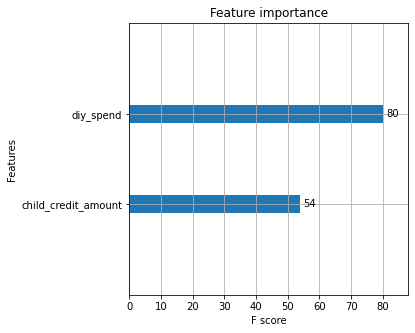

In [396]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

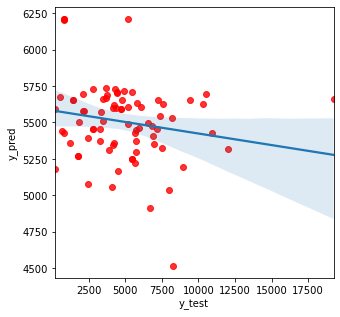

In [397]:
sns.regplot(x="y_test", y="y_pred", data=error_df, scatter_kws={"color":"red"})

# Conclusion

 Whilst the regression model that I have implemented using XGBoost, my team opted against this model when predicting monthly payments, as the metrics were not justified in creating a model. I 